In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/ECE232E/PS2/gplus"
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Q18
import os
all_files = [file for file in os.listdir(path) if file.endswith(".circles")]

count = 0
for file in all_files:
    circle_file = os.path.join(path, file)
    with open(circle_file, "r") as f:
        lines = f.readlines()
        if len(lines) > 2:
            count += 1

print("Number of Personalized Networks with more than 2 circles is", count)

Number of Personalized Networks with more than 2 circles is 57


Node ID: 109327480479767108490
In-degree: mean=14.062, Variance=95.877


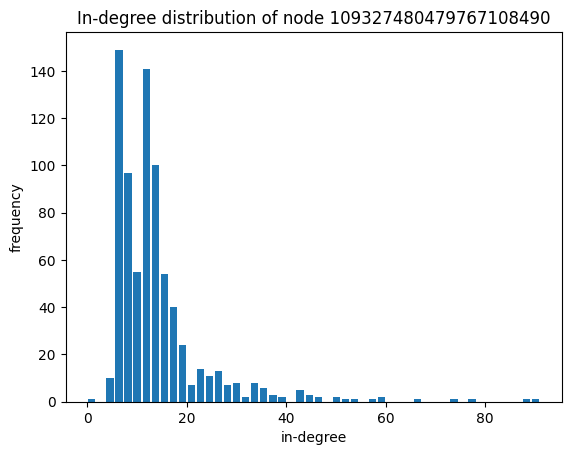

Out-degree: mean=14.062, Variance=4582.249


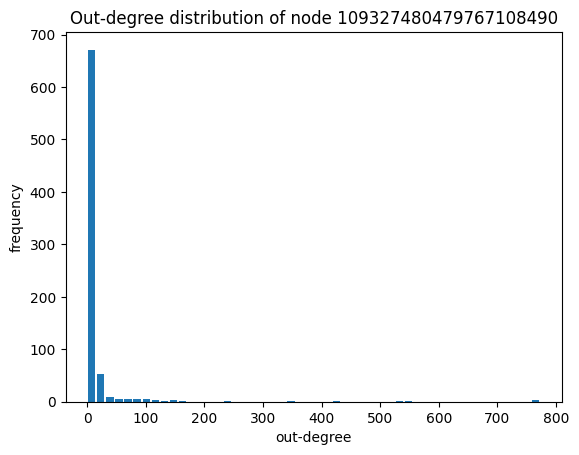

Node ID: 115625564993990145546
In-degree: mean=43.640, Variance=1019.516


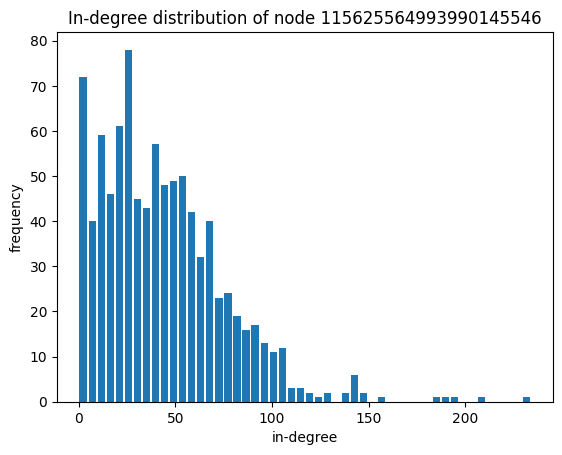

Out-degree: mean=43.640, Variance=9341.183


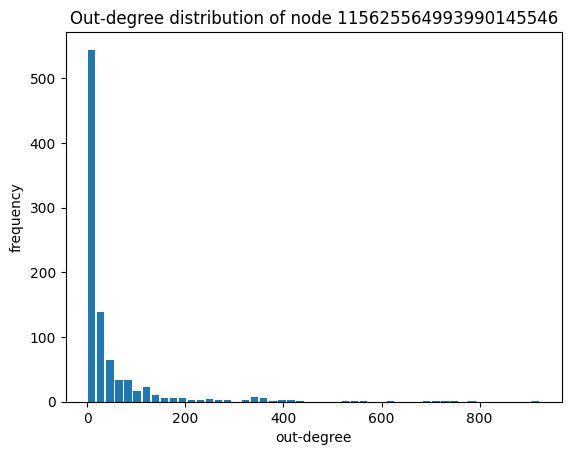

Node ID: 101373961279443806744
In-degree: mean=298.118, Variance=86386.120


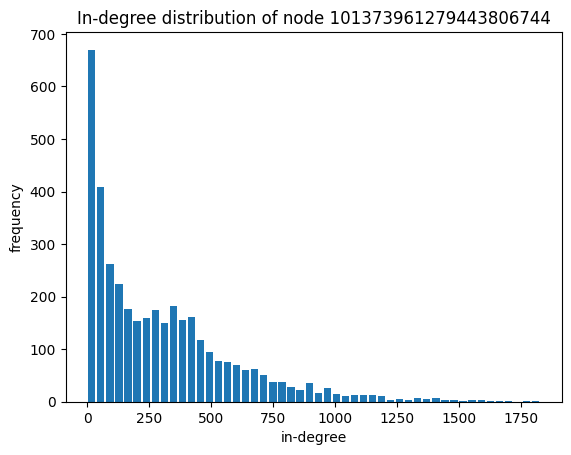

Out-degree: mean=298.118, Variance=166143.175


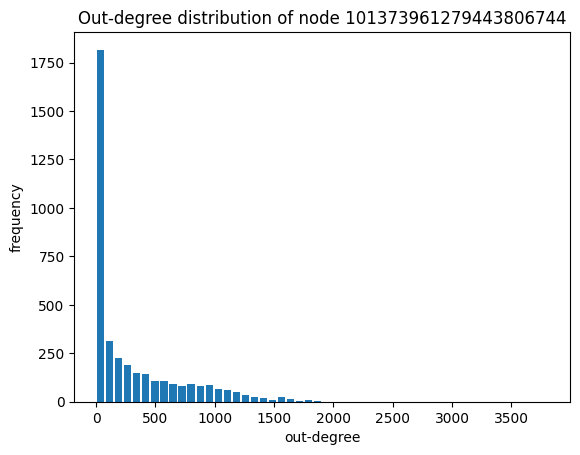

In [ ]:
# Q19
import os
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

nodes_list = ["109327480479767108490", 
              "115625564993990145546", 
              "101373961279443806744"]
graphs = []

for node in nodes_list:
    print(f"Node ID: {node}")
    node_file = os.path.join(path, f"{node}.edges")
    node_graph = ig.Graph.Read_Ncol(node_file, directed=True)

    node_graph.add_vertex(node)
    index = node_graph.vs.find(name=node).index
    el = [(index, vertex) for vertex in range(node_graph.vcount()-1)]
    node_graph.add_edges(el)

    # save for next question
    graphs.append(node_graph)
    
    in_degrees = node_graph.indegree()
    print(f"In-degree: mean={np.mean(in_degrees):.3f}, \
Variance={np.var(in_degrees):.3f}")
    plt.title(f'In-degree distribution of node {node}')
    plt.hist(in_degrees, bins=50, rwidth=0.8, log=False)
    plt.xlabel('in-degree')
    plt.ylabel('frequency')
    plt.show()

    out_degrees = node_graph.outdegree()
    print(f"Out-degree: mean={np.mean(out_degrees):.3f}, \
Variance={np.var(out_degrees):.3f}")
    plt.title(f'Out-degree distribution of node {node}')
    plt.hist(out_degrees, bins=50, rwidth=0.8, log=False)
    plt.xlabel('out-degree')
    plt.ylabel('frequency')
    plt.show()

Modularity of Node ID 109327480479767108490 is 0.27528


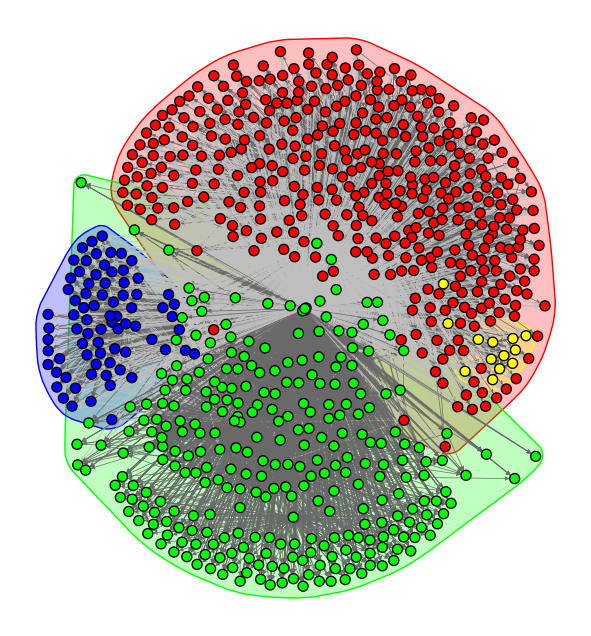

Modularity of Node ID 115625564993990145546 is 0.31996


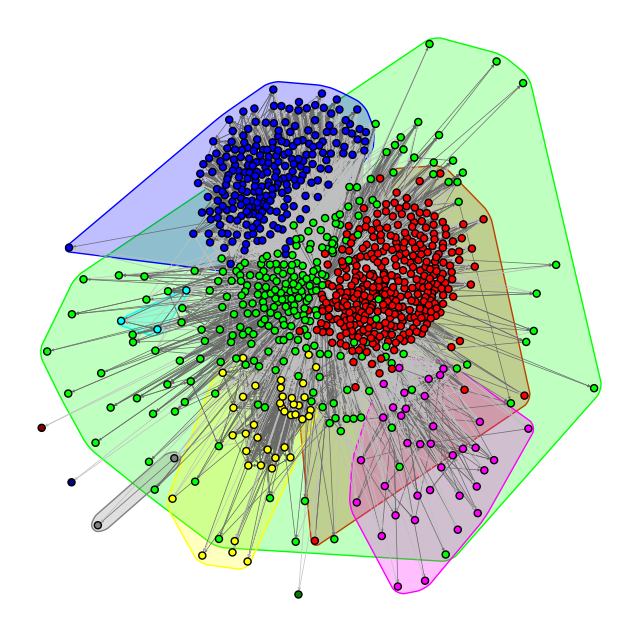

Modularity of Node ID 101373961279443806744 is 0.19204


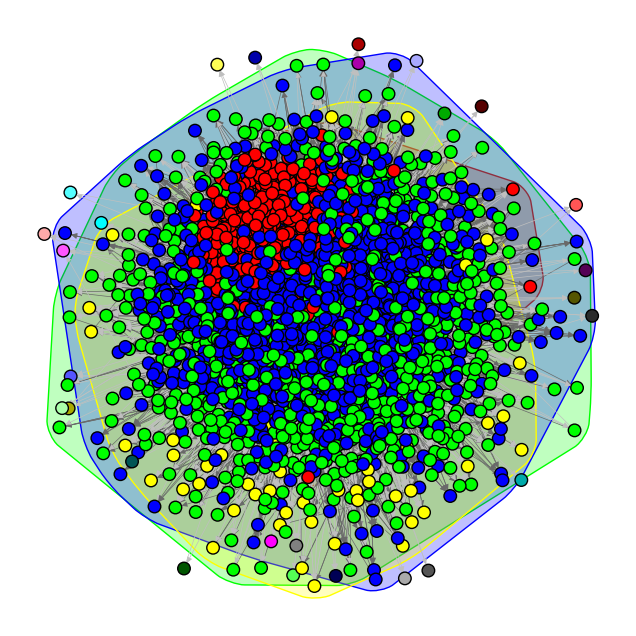

In [ ]:
# Q20
for i, graph in enumerate(graphs):
    wtc = graph.community_walktrap()
    node_community = wtc.as_clustering()
    modul = node_community.modularity
    print(f"Modularity of Node ID {nodes_list[i]} is {modul:.5f}")
    fig, ax = plt.subplots(figsize=(8,8))
    ig.plot(node_community, 
            target=ax,
            vertex_size=0.2,
            edge_width=0.5,
            mark_groups = True)
    plt.show()


In [13]:
import os
import igraph as ig
import numpy as np
from collections import Counter
from scipy.stats import entropy as scipy_entropy

def entropy(labels):
    count = Counter(labels)
    pk = np.array(list(count.values())) / len(labels)
    return scipy_entropy(pk, base=None)

def HandC(id):
    g = ig.Graph.Read_Ncol(os.path.join(path, f"{id}.edges"), directed=True)
    node_index_map = {node: index for index, node in enumerate(g.vs["name"])}
    g.add_vertex(id)
    g.add_edge(g.vs.find(id), g.vs.find(id))
    community = g.community_walktrap().as_clustering()

    filename = os.path.join(path, f"{id}.circles")
    with open(filename) as f:
        circles = [line.strip().split()[1:] for line in f.readlines()]

    number_cir = len(circles)
    number_com = len(community)

    circlelist = circles

    ai = [len(circle) for circle in circlelist]

    total_membership = community.membership

    b_frame = Counter([total_membership[node_index_map[node]] \
                       for circle in circlelist for node in circle])

    bi = [b_frame.get(i, 0) for i in range(number_com)]

    N = sum(ai)
    p_ai = np.array(ai) / N
    p_bi = np.array(bi) / N

    H_K = -sum(p * np.log(p) for p in p_bi if p != 0)

    A_Matrix = np.zeros((number_cir, number_com))

    for i, circle in enumerate(circlelist):
        community_vector = [0] * number_com
        sub_membership = Counter([total_membership[node_index_map[node]] \
                                  for node in circle])
        for j, count in sub_membership.items():
            community_vector[j] = count
        A_Matrix[i, :] = community_vector

    H_C = entropy(ai)
    H_CK = sum(A_Matrix[i, j] / N * np.log(A_Matrix[i, j] / bi[j]) for i in \
        range(number_cir) for j in range(number_com) if A_Matrix[i, j] != 0)
    H_KC = sum(A_Matrix[i, j] / N * np.log(A_Matrix[i, j] / ai[i]) for i in \
        range(number_cir) for j in range(number_com) if A_Matrix[i, j] != 0)

    h = 1 + H_CK / H_C
    c = 1 + H_KC / H_K
    print(f"The homogeneity score for node {id} is {h}")
    print(f"The completeness score for node {id} is {c}")
    return h, c

Node_idS = ["109327480479767108490", 
            "115625564993990145546", 
            "101373961279443806744"]
scores = [HandC(id) for id in Node_idS]

The homogeneity score for node 109327480479767108490 is 0.5352127055049829
The completeness score for node 109327480479767108490 is 0.5588929784185591
The homogeneity score for node 115625564993990145546 is 0.1482230190660333
The completeness score for node 115625564993990145546 is 0.3856599861073524
The homogeneity score for node 101373961279443806744 is 0.000841389497055034
The completeness score for node 101373961279443806744 is 0.00039653546996876177
